In [16]:
# https://altair-viz.github.io/gallery/scatter_with_loess.html

import altair as alt
import pandas as pd
import numpy as np

np.random.seed(1)

source = pd.DataFrame({
    'x': np.arange(100),
    'A': np.random.randn(100).cumsum(),
    'B': np.random.randn(100).cumsum(),
    'C': np.random.randn(100).cumsum(),
})

base = alt.Chart(source).mark_circle(opacity=0.5).transform_fold(
    fold=['A', 'B', 'C'],
    as_=['category', 'y']
).encode(
    alt.X('x:Q'),
    alt.Y('y:Q'),
    alt.Color('category:N')
)

base += base.transform_loess('x', 'y', groupby=['category']).mark_line(size=4)

# base.save("loess.png")
base

alt.LayerChart(...)

In [17]:
# https://altair-viz.github.io/gallery/line_with_ci.html

import altair as alt
from vega_datasets import data

source = data.cars()

line = alt.Chart(source).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)

band = alt.Chart(source).mark_errorband(extent='ci').encode(
    x='Year',
    y=alt.Y('Miles_per_Gallon', title='Miles/Gallon'),
)

band += line

# band.save("band.png")
band

alt.LayerChart(...)

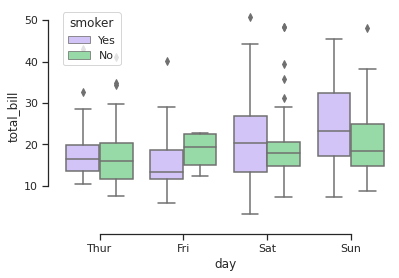

In [18]:
# https://seaborn.pydata.org/examples/grouped_boxplot.html

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
plot = sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

fig = plot.get_figure()
fig.savefig("boxes.png")

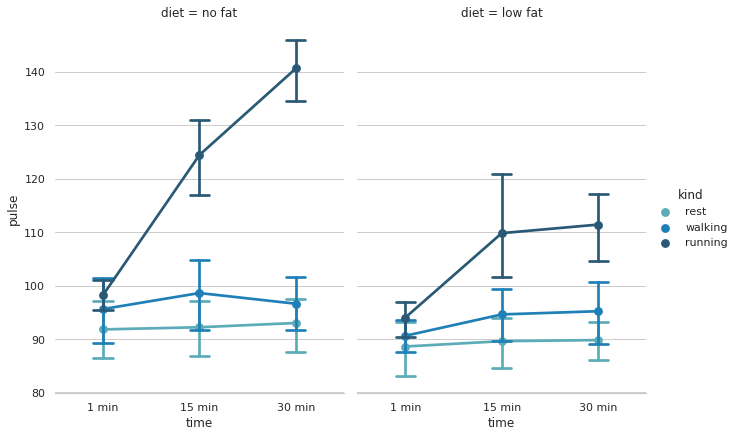

In [23]:
# https://seaborn.pydata.org/examples/pointplot_anova.html

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

g.savefig("error-bars.png")